In [1]:
# 1. Import pyafmreader loadfile and matplotlib
from pyfmreader import loadfile
import matplotlib.pyplot as plt
import os

# Get documentation about loadfile function
help(loadfile)

Help on function loadfile in module pyfmreader.pyfmreader:

loadfile(filepath)
    Load AFM file. 
    
    Supported formats:
        - JPK --> .jpk-force, .jpk-force-map, .jpk-qi-data
        - JPK Thermal --> .tnd
        - NANOSCOPE --> .spm, .pfc, .00X
        - UFF --> .uff
        - PS-NEX --> .tdms
        - IBW --> .ibw (Asylum files)
        - ARDF --> .ARDF (Asylum force maps)
    
            Parameters:
                    filepath (str): Path to the file.
            
            Returns:
                    If JPK, NANOSCOPE OR UFF:
                        UFF (uff.UFF): Universal File Format object containing loaded data.
                    If JPK Thermal:
                        Amplitude (m^2/V) (np.array),
                        Frequencies (Hz) (np.array),
                        Fit-Data (m^2/V) (np.array),
                        Parameters (dict)



In [2]:
# 2. Load one of the test files
NANOSC_PFC_PATH = '/Users/yogehs/Documents/ATIP_PhD/Devam_larva/test_fc_for_tingfit/qi-data-2025.01.29-17.39.09.524_00037.jpk-qi-series'

NANOSC_PFC_FILE = loadfile(NANOSC_PFC_PATH)

type(NANOSC_PFC_FILE)
NANOSC_PFC_FILE.isFV

False

In [3]:
# 3. Get file metadata
metadata = NANOSC_PFC_FILE.filemetadata

for key, item in metadata.items():
    print(f"{key} : {item}\n") 

file_path : /Users/yogehs/Documents/ATIP_PhD/Devam_larva/test_fc_for_tingfit/qi-data-2025.01.29-17.39.09.524_00037.jpk-qi-series

Entry_filename : qi-data-2025.01.29-17.39.09.524_00037.jpk-qi-series

file_size_bytes : 52952

file_type : jpk-qi-series

UFF_code : _1_2_3_4_5

Entry_UFF_version : 0

file_id : 17.39.09.524

force_volume : 0

Experimental_instrument : JPK00498

JPK_file_format_version : 2.0

JPK_software_version : 6.4.34

retracted_delay : 0.0

extended_delay : 0.0

Entry_date : None

scan_angle : 0.0

num_x_pixels : 1

num_y_pixels : 1

scan_size_x : 0.0

scan_size_y : 0.0

z_closed_loop : false

Recording_Z_close_loop_on : Off

Entry_tot_nb_curve : 1

extend_pause_duration : 0.0

force_setpoint : 0.0

nbr_channels : 8

defl_sens_nmbyV : 7.037199934594127

spring_const_Nbym : 0.103

channel_properties : {'height': {'channel_id': 0, 'encoder_type': 'signedinteger', 'encoder_offet_key': 57.55886501340634, 'encoder_multiplier_key': 2.6812676812245667e-08, 'base': 'volts', 'ba

In [4]:
# 4. Get force volume piezo image and plot it
piezoimg = NANOSC_PFC_FILE.getpiezoimg()

plt.figure(figsize=(10,10))
plt.imshow(piezoimg[:, :, 0], cmap='afmhot', origin='lower')
plt.show()

UnboundLocalError: local variable 'piezoimg' referenced before assignment

In [5]:
# 5. Get force curve at index 0
FC = NANOSC_PFC_FILE.getcurve(0)

type(FC)

pyfmreader.utils.forcecurve.ForceCurve

In [6]:
help(FC.preprocess_force_curve)

Help on method preprocess_force_curve in module pyfmreader.utils.forcecurve:

preprocess_force_curve(deflection_sens, height_channel_key, y0=None) method of pyfmreader.utils.forcecurve.ForceCurve instance
    Computes Vertical Deflection in m and populates the vdeflection, zheight 
    and time properties for each segment in the force curve.
    
    vDeflection(m) = (vDeflection(V) - baseline(V)) * deflection_sens(m/V)
    
    if y0 is not None:
        vDeflection(m) = (vDeflection(V) - y0(V)) * deflection_sens(m/V)
    
            Parameters:
                    deflection_sens (float): In m/V
                    height_channel_key (str): Dictionary key to find height data in self.segment_formated_data.
                    y0 (float): Manual offset for the vertical deflection, in Volts.
            
            Returns: None



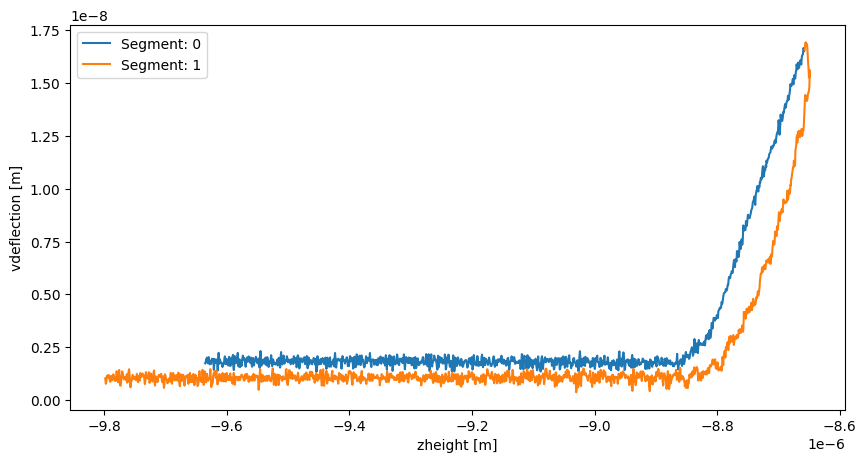

In [9]:
# 6. Preprocess curve with the deflection sens in the header
defl_sens = metadata['defl_sens_nmbyV'] / 1e09 # nm/V --> m/V
FC.preprocess_force_curve(defl_sens, metadata['height_channel_key'])
plt.figure(figsize=(10,5))
for segid, segment in FC.get_segments():
    plt.plot(-1*segment.zheight, segment.vdeflection, label=f'Segment: {segid}')
plt.xlabel('zheight [m]')
plt.ylabel('vdeflection [m]')
plt.legend()
plt.show()

In [ ]:
# 7. Get Force vs Indentation curve
poc = [0.5 * 1e-8, 0.0] # in nm
spring_k = metadata['spring_const_Nbym']
FC.get_force_vs_indentation(poc, spring_k)
plt.figure(figsize=(10,5))
for segid, segment in FC.get_segments():
    plt.plot(segment.indentation, segment.force, label=f'Segment: {segid}')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.xlabel('Indentation [m]')
plt.ylabel('Force [N]')
plt.legend()
plt.show()

In [ ]:
# 8. Get segment 0
FC_segments = FC.get_segments()
_, segment_0 = FC_segments[0]
type(segment_0)

In [ ]:
# 9. Plot only segment 0
plt.figure(figsize=(10,5))
plt.plot(segment_0.zheight, segment_0.vdeflection, label=f'Segment: 0')
plt.xlabel('zheight [nm]')
plt.ylabel('vdeflection [nm]')
plt.legend()
plt.show()

In [ ]:
# 9. Get force vs indentation for segment 0
plt.figure(figsize=(10,5))
plt.plot(segment_0.indentation, segment_0.force, label=f'Segment: 0')
plt.xlabel('zheight [nm]')
plt.ylabel('vdeflection [nm]')
plt.legend()
plt.show()